# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import numpy as np
import requests 
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import json
from citipy import citipy
import random
from config import api_key
import time
from scipy.stats import linregress


## Generate Cities List

In [2]:
# set latitude and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create an empty list for recording cities (latitude/longitude)
lat_lngs  = []
cities = []

# Create a loop to iterate through & append random cities 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1400)
lat_lngs = zip(lats, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)
        
# print how many cities are in the list     
print(len(cities))

561


In [3]:
# get response in json format
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q=adrar").json()
response

{'coord': {'lon': -10.0711, 'lat': 20.5022},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 29.56,
  'feels_like': 27.81,
  'temp_min': 29.56,
  'temp_max': 29.56,
  'pressure': 1011,
  'humidity': 16,
  'sea_level': 1011,
  'grnd_level': 967},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 61, 'gust': 4.25},
 'clouds': {'all': 58},
 'dt': 1619514517,
 'sys': {'country': 'MR', 'sunrise': 1619503970, 'sunset': 1619550161},
 'timezone': 0,
 'id': 2381972,
 'name': 'Adrar',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create lists to store data
city_name = []
lat =[]
lng =[]
Max_temp =[]
Humidity =[]
Cloudiness =[]
Wind_speed =[]
Country =[]
Date =[]

record_count = 0
set_count = 1

# set url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
#begin print
print(f'Beginning Data Retrieval \n ---------------')

# Loop through each city
for city in cities:

    response = requests.get(query_url + city).json()
    
    try:
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
              
        if record_count > 49:
            record_count = 0
            set_count = set_count + 1
             
        else:
            record_count = record_count + 1
            
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
           
    except:
        
        print("City not found. Skipping...")
        
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")  
        
    

Beginning Data Retrieval 
 ---------------
Processing Record 1 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kavaratti
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | busselton
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | tromso
Processing Record 12 of Set 1 | necochea
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | kyabram
City not found. Skipping...
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | zanjan
Processing Record 18 of Set 1 | sulangan
Processing Record 19 of Set 1 | rikitea
Proces

Processing Record 35 of Set 4 | blythe
Processing Record 36 of Set 4 | kyaikkami
Processing Record 37 of Set 4 | hami
Processing Record 38 of Set 4 | wynyard
Processing Record 39 of Set 4 | lambarene
Processing Record 40 of Set 4 | honiara
Processing Record 41 of Set 4 | camden
Processing Record 42 of Set 4 | emerald
City not found. Skipping...
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | chumikan
Processing Record 45 of Set 4 | aripuana
Processing Record 46 of Set 4 | beyneu
Processing Record 47 of Set 4 | havelock
Processing Record 48 of Set 4 | businga
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | grenfell
Processing Record 0 of Set 5 | effingham
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | gudari
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | jardim
Processing Record 5 of Set 5 | conceicao da barra
Processing Record 6 of Set 5 | shimoda
Processing Record 7 of Set 5 | upernavik
Pro

Processing Record 22 of Set 8 | san quintin
Processing Record 23 of Set 8 | kungurtug
Processing Record 24 of Set 8 | port hueneme
Processing Record 25 of Set 8 | dunedin
Processing Record 26 of Set 8 | hurghada
Processing Record 27 of Set 8 | christchurch
Processing Record 28 of Set 8 | san cristobal
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | teshie
Processing Record 31 of Set 8 | altay
Processing Record 32 of Set 8 | fukue
Processing Record 33 of Set 8 | kamaishi
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | namatanai
Processing Record 37 of Set 8 | xuanhua
City not found. Skipping...
Processing Record 38 of Set 8 | powell
Processing Record 39 of Set 8 | aksu
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | katherine
Processing Record 42 of Set 8 | kawalu
Processing Record 43 of Set 8 | krasnozerskoye
Processing Record 44 of Set 8 | esna
Processing Record 45 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary with reults 
city_dict = {"City":city_name, 
             "Lat":lat,
             "Lng":lng,
             "Max Temp":Max_temp,
             "Humidity":Humidity,
             "Cloudiness":Cloudiness,
             "Wind Speed":Wind_speed,
             "Country":Country,
             "Date":Date
            }

# Convert dictionary to dataframe
city_df = pd.DataFrame(city_dict)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,79.00,100,75,14.97,MU,1619514532
1,Albany,42.6001,-73.9662,41.00,47,98,4.83,US,1619514823
2,Ushuaia,-54.8000,-68.3000,41.00,87,75,2.30,AR,1619514823
3,Mataura,-46.1927,168.8643,43.00,87,98,1.01,NZ,1619514823
4,Kavaratti,10.5669,72.6420,84.99,72,100,5.59,IN,1619514823
...,...,...,...,...,...,...,...,...,...
515,Carutapera,-1.1950,-46.0200,74.77,92,62,3.69,BR,1619514896
516,Oruzgan,32.8333,66.0000,82.90,9,6,11.50,AF,1619514896
517,Kloulklubed,7.0419,134.2556,82.40,78,75,5.75,PW,1619514897
518,Guerrero Negro,27.9769,-114.0611,57.88,80,7,11.79,MX,1619514897


In [7]:
# Export to csv file
city_df.to_csv("Output_data/Cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#no cities have humidity greater than 100%


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

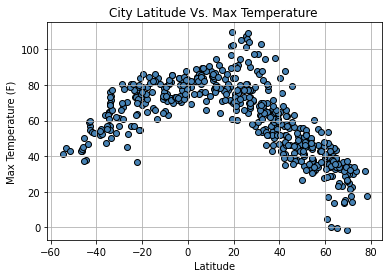

This code is analysing the relationship between Latitude and Max temperature of each city in the list to get a better idea of how temperature increases/decreses in a city based on the latitude of the city.


In [24]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Max Temp']

# plot scatter
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

# add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature ")
plt.grid()

# save image 
plt.savefig("Images/Lat_vs_temp_plot.png")
plt.show()


print(f"This code is analysing the relationship between Latitude and Max temperature of each city. This will help to get a better understanding of how the max temperature in a city is affected by its location.")


## Latitude vs. Humidity Plot

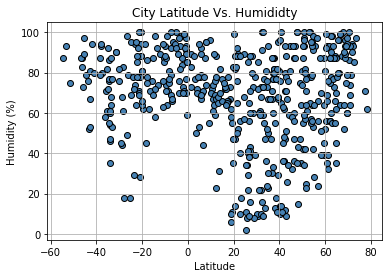

This code is analysing the relationship between Latitude and humidity of each city. We are analysing to see if there is a relationship between the location of a city and the percentage of humidity.


In [25]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Humidity']

# plot scatter
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

# add labels and grid
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humididty")
plt.grid()

# save image 
plt.savefig("Images/Lat_vs_humidity_plot.png")
plt.show()

print(f"This code is analysing the relationship between Latitude and humidity of each city. We are analysing to see if there is a relationship between the location of a city and the percentage of humidity.")

## Latitude vs. Cloudiness Plot

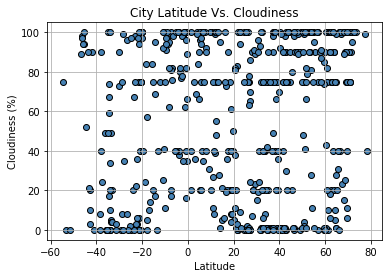

This code is analysing if there is a relationship between cloudiness of a city and its location.


In [26]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Cloudiness']

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness")
plt.grid()

plt.savefig("Images/Lat_vs_cloudiness_plot.png")
plt.show()

print(f"This code is analysing if there is a relationship between cloudiness of a city and its location.")

## Latitude vs. Wind Speed Plot

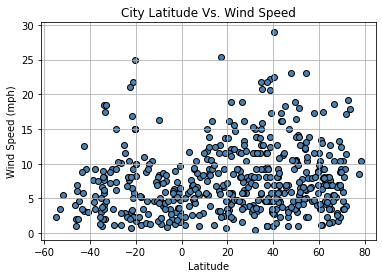

This code is analysing if there is a relationship between wind speed of a city and its location.


In [27]:
# set x and y values
x_value = city_df['Lat']
y_value = city_df['Wind Speed']

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude Vs. Wind Speed")
plt.grid()

plt.savefig("Images/Lat_vs_windspeed_plot.png")
plt.show()

print(f"This code is analysing if there is a relationship between wind speed of a city and its location.")

## Linear Regression

In [15]:
# Create new data frames
Nth_hem_df = city_df[city_df["Lat"] >=0]
Sth_hem_df = city_df[city_df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.86


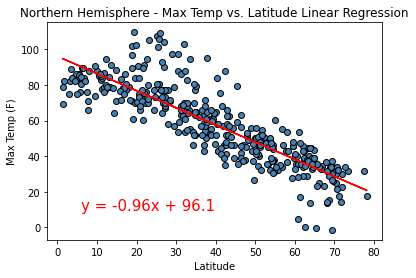

In [36]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Max Temp']

correlation = st.pearsonr(x_value,y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_temp_lat_linereg.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.74


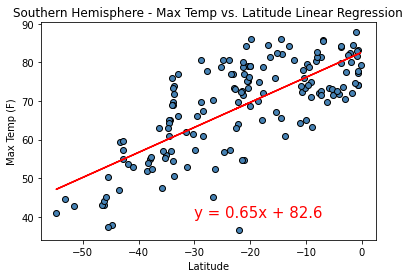

There is a strong negative correlation between Max Temp of a city and the latitude of a city in the Northern Hemisphere while in the Southern Hemisphere there is a strong positive correlation.
The closer you are to the equater the higher the max temperature is.


In [37]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Max Temp']

correlation = st.pearsonr(x_value,y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_value = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_temp_lat_linereg.png")
plt.show()

print(f"There is a strong negative correlation between Max Temp of a city and the latitude of a city in the Northern Hemisphere while in the Southern Hemisphere there is a strong positive correlation.")
print(f"The closer you are to the equater the higher the max temperature is.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16


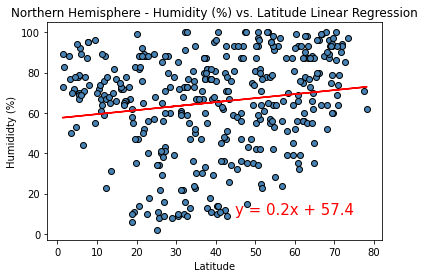

In [38]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Humidity']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_hum_lat_linereg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19


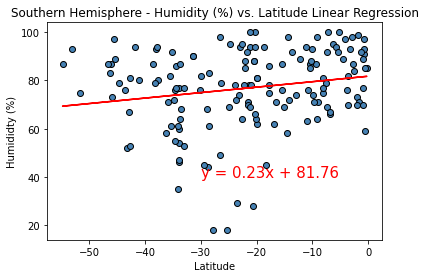

There is almost no correlation between humidity and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.


In [39]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Humidity']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_hum_lat_linereg.png")
plt.show()

print(f"There is almost no correlation between humidity and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.") 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16


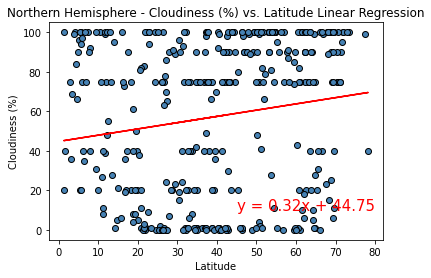

In [40]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Cloudiness']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_cloud_lat_linereg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.31


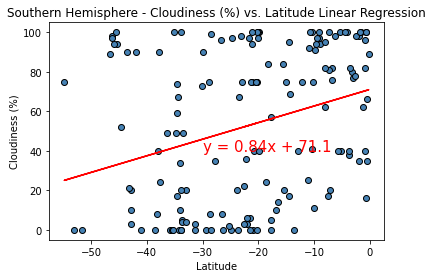

There is almost no correlation between cloudiness and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.


In [41]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Cloudiness']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_cloud_lat_linereg.png")
plt.show()

print(f"There is almost no correlation between cloudiness and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.") 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02


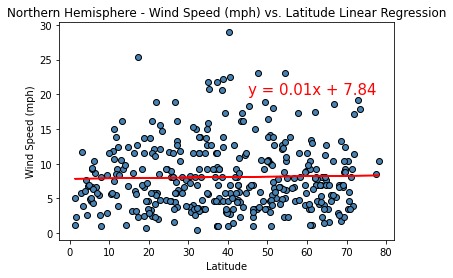

In [43]:
# set x and y values
x_value = Nth_hem_df['Lat']
y_value = Nth_hem_df['Wind Speed']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")

plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Nth_wind_lat_linereg.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.08


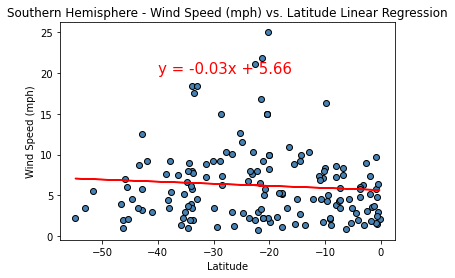

There is no correlation between wind speed and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.


In [44]:
# set x and y values
x_value = Sth_hem_df['Lat']
y_value = Sth_hem_df['Wind Speed']

correlation = st.pearsonr(x_value,y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regress_value,"r-")
plt.scatter(x_value, y_value,marker="o", facecolors="steelblue", edgecolors="black")

plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-value is: {round(correlation[0],2)}")

plt.savefig("Images/Sth_wind_lat_linereg.png")
plt.show()

print(f"There is no correlation between wind speed and Latitude of a city for both the Southern Hemisphere and Northern Hemisphere.") 